## Cellular Automata Rickert Model

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class MultiLaneSimulation:
    def __init__(self, length = 100, density = 0.1, maxv = 5, pslow = 0.5, nlanes = 2):
        self.length = length
        self.density = density
        self.maxv = maxv
        self.pslow = pslow
        self.nlanes = nlanes
        
        self.state = [maxv if i <= length*nlanes*density else -1 for i in range(length*nlanes)]
        np.random.shuffle(self.state)
        self.state = np.reshape(self.state,(nlanes, length))
        
    def display(self):
        print('\n'.join(''.join('.' if x == -1 else str(x) for x in row) for row in self.state) + "\n")
        
    def switch(self):
        copy = np.copy(self.state)
        
        for j in range(len(self.state)):
            for i, v in enumerate(self.state[j]):
                if v >= 0:
                    l = 1
                    
                    # Check distance in front. No need to switch if there is space in currently lane
                    while copy[j, (i + l) % self.length] == -1 and l <= v + 1: l += 1
                    if l > v+1: 
                        #print("j",j,"i", i,"v", v,"l", l)
                        continue
                        
                    # Check if left lane, then right lane is suitable for a switch. 
                    for lane in (j-1, j+1):
                        # Lane not suitable if it doesn't exist,
                        if lane < 0 or lane + 1 > self.nlanes: continue
                        
                        # lane is not suitable if not enough distance in front or at the back
                        d_front, d_back = 0, 0 
                        while copy[lane, (i + d_front) % self.length] == -1 and d_front <= v + 1: d_front += 1
                        while copy[lane, (i - d_back) % self.length] == -1 and d_back <= self.maxv: d_back += 1
                        if d_front < v or d_back < self.maxv: continue

                        #print(f"switching vehicle {v} at {(j,i)} to {(lane,i)}")
                        #self.state[j, i], self.state[lane, i] = -1, v
                        copy[j, i], copy[lane, i] = -1, v
                        break

        self.state = copy
    
    def calculate(self):
        for j in range(len(self.state)):
            for i, v in enumerate(self.state[j]):
                if v >= 0:
                    d = 1
                    while self.state[j, (i + d) % self.length] == -1: d += 1

                    self.state[j, i] = min(self.state[j, i] + 1, self.maxv) if d > v + 1 else (d - 1)

                    if (self.state[j, i] > 0 and np.random.random() < self.pslow): self.state[j, i] -= 1
                        
    def update(self):
        newstate = -np.ones((self.nlanes, self.length), int)
        
        flow = 0
        
        for j in range(self.nlanes):
            for i, v in enumerate(self.state[j]):
                if i + v > self.length:
                    flow += 1
                if v >= 0:
                    newstate[j,(i + v) % self.length] = v
                    
        self.state = newstate
        return flow/self.nlanes
    
    def run(self, n, verbose = False, switching = True):
        flows = []
        for i in range(n):
            if verbose: self.display()
            if switching: self.switch()
            self.calculate()
            flows.append(self.update())

        return np.mean(flows)
    
    def q1to6(self, verbose = False):
        if verbose:
            print("before switching"), q.display(); 
            for i in range(2):
                print("switch"), q.switch(); q.display(); 
                print("calculate"), q.calculate(); q.display(); 
                print("update"), q.update(); q.display(); 
            print("switch")
        else:
            for i in range(2): q.display(); q.switch(); q.calculate(); q.update();
            q.display()

In [3]:
np.random.seed(13)
multi = MultiLaneSimulation(pslow = 0)
multi.run(10, verbose = True, switching = True)

.......................5.........5.5.5..........5...5..55................5....5.....................
....5.....5......5.....5......................55........5................5...5......5...........5...

.........5............5.....5.......1.....5........3..20.....5...............4.....5................
.5.............5............5.........5.......0.....5........5..............3.....5......5..........

..............5..................5....2........5.....20.1.........5...............5.....5...........
......5.............5......5.....5.........5...1.........5........5.............4......5......5.....

...................5............5....4...3..........5..1..2............5...............5.....5......
...........5.............5............5.......3..2......3.....5........5.............5......5......5

........................5...............3....4....4...2..2...3..............5...............5.....5.
....5...........5.............5......5.....5........3.......4......5........5..........

0.35

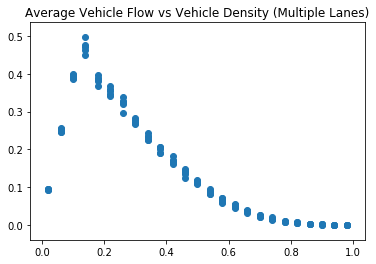

In [9]:
densities = np.arange(0.02, 1, 0.04).repeat(5)
multiflow2 = [MultiLaneSimulation(100, d, 5, 0.5, nlanes = 2).run(n=100) for d in densities]

plt.scatter(densities, multiflow)
plt.title("Average Vehicle Flow vs Vehicle Density (Multiple Lanes)")
plt.show()

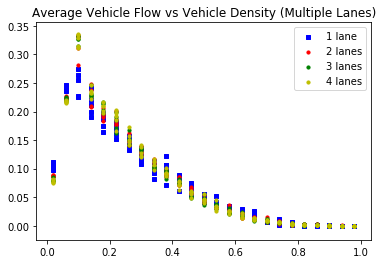

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(densities, [MultiLaneSimulation(100, d, 5, 0.5, nlanes = 1)
                        .run(n=1000) for d in densities], s=10, c='b', marker="s", label='1 lane')
ax1.scatter(densities, [MultiLaneSimulation(100, d, 5, 0.5, nlanes = 2)
                        .run(n=1000) for d in densities], s=10, c='r', marker="o", label='2 lanes')
ax1.scatter(densities, [MultiLaneSimulation(100, d, 5, 0.5, nlanes = 3)
                        .run(n=1000) for d in densities], s=10, c='g', marker="o", label='3 lanes')
ax1.scatter(densities, [MultiLaneSimulation(100, d, 5, 0.5, nlanes = 4)
                        .run(n=1000) for d in densities], s=10, c='y', marker="o", label='4 lanes')

plt.legend(loc='upper right');
plt.title("Average Vehicle Flow vs Vehicle Density (Multiple Lanes)")
plt.show()

### 5.1 Preclasswork Questions

In [5]:
print("Question 1")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[1,(7,11)] = 2; q.q1to6()

print("Question 2")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[1,(8,11)] = 2; q.q1to6()

print("Question 3")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[0,5] = 1; q.state[1,(8,11)] = 2; q.q1to6()

print("Question 4")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[1,(9,11)] = 2; q.q1to6()

print("Question 5")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[0,11] = 5; q.state[1,(9,11)] = 2; q.q1to6()

print("Question 6")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[(0,1),3] = 5; q.state[1,7:10] = (1,0,0); q.state[(0,1),12] = (3,1); q.state[1,15] = 2; q.q1to6()


Question 1
...................
.......2...2.......

...................
..........3...3....

..............4....
..................4

Question 2
...................
........2..2.......

...........3.......
..............3....

...............4...
..................4

Question 3
.....1.............
........2..2.......

.......2...........
..........2...3....

..........3........
.............3....4

Question 4
...................
.........2.2.......

............3......
..............3....

................4..
..................4

Question 5
...........5.......
.........2.2.......

..........1.....5..
..............3....

..5.........2......
..................4

Question 6
...5........3......
...5...100..1..2...

.......4.1......4..
......3.1.1...2...3

..5.....1..2.......
...4...1.1..2....3.



In [6]:
print("Question 5")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[0,11] = 5; q.state[1,(9,11)] = 2; q.q1to6(verbose = True)

Question 5
before switching
...........5.......
.........2.2.......

switch
.........2.5.......
...........2.......

calculate
.........1.5.......
...........3.......

update
..........1.....5..
..............3....

switch
..........1.....5..
..............3....

calculate
..........2.....5..
..............4....

update
..5.........2......
..................4

switch


In [7]:
print("Question 6")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[(0,1),3] = 5; q.state[1,7:10] = (1,0,0); q.state[(0,1),12] = (3,1); q.state[1,15] = 2; q.q1to6(verbose = True)

Question 6
before switching
...5........3......
...5...100..1..2...

switch
...5....0...3......
...5...1.0..1..2...

calculate
...4....1...4......
...3...1.1..2..3...

update
.......4.1......4..
......3.1.1...2...3

switch
.......4.1......4..
......3.1.1...2...3

calculate
.......1.2......5..
......1.1.2...3...4

update
..5.....1..2.......
...4...1.1..2....3.

switch


In [8]:
print("Question 6")
q = MultiLaneSimulation(length = 19, pslow = 0); q.state = -np.ones((2,19),int)
q.state[(0,1),3] = 5; q.state[1,7] = 1; q.state[1,9] = 0; q.state[(0,1),12] = (3,1); q.state[1,15] = 2; q.q1to6(verbose = True)

Question 6
before switching
...5........3......
...5...1.0..1..2...

switch
...5........3......
...5...1.0..1..2...

calculate
...5........4......
...3...1.1..2..3...

update
........5.......4..
......3.1.1...2...3

switch
........5.......4..
......3.1.1...2...3

calculate
........5.......5..
......1.1.2...3...4

update
..5..........5.....
...4...1.1..2....3.

switch
